#Building a training data set

The aim of this script is to read data from the MBED accelerometer and a pressure sensor to build a training data set.

First, individual events will be recorded using the accelerometer and pressure sensor. The events will be saved in the matrix ${\bf e_{M}}$. The matrix will have four columns, acceleration in $x_{N}, y_{N}, z_{N}$ and pressure $p_{N}$, and it will have $N$ rows.

$$
{\rm event~matrix:~~~} {\bf e_{M}}~=~\left[
\begin{matrix}
x_{1} & y_{1} & z_{1} & p_{1}\\
x_{2} & y_{2} & z_{2}& p_{2}\\
\vdots & \vdots & \vdots & \vdots\\ 
x_{N} & y_{N} & z_{N} & p_{N}\\
\end{matrix}
\right]
$$

Each matrix will be exported into a file with the header indicating the type of event, which are encoded as follows:

```
walk = 1
stand = 2
lie down = 3
sit down = 4
fall = 5
motionless = 6
```

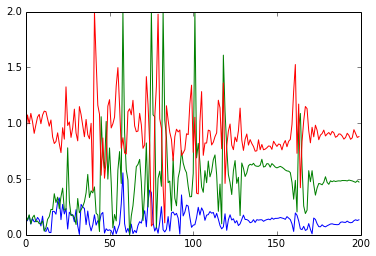

In [79]:
import serial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#data = open('fall_data_set.dat','w')
#headerLine = ("X \t Y \t Z \n")
#data.write(headerLine)

ser = serial.Serial('/dev/tty.usbmodem1432',9600)

n_rows = 200
n_parameters = 3

e_M = np.zeros(shape=(n_rows,n_parameters))
it = 0

try:
    while it < n_rows:
        #print it
        try:
            line = ser.readline()   
            line = line.strip() #removes trailing whitespaces at start&end of string   
            buf = np.array([float(val) for val in line.split()])
            if(len(buf)==3):
                #print buf
                e_M[it] = buf
                it += 1
        except:
            continue 
except:
    pass

plt.plot(e_M)
plt.show()

np.savetxt('event8.txt',e_M,header='1')

ser.close()

Now, a feature matrix ${\bf X}$ is constructed in which each line contains one event $e_{M}$. The element $a_{M}$ in the accompanying label vector $A$ will indicate what type of event $e_{M}$ is, *e.g.* ``fall`` or ``sit down``.

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
e_{1}\\
e_{2}\\
\vdots\\ 
e_{M}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf A}~=~ [a_1, a_2, \cdots a_M]
$$

In [81]:
import numpy as np

n_rows = 200
n_parameters = 3
n_events = 8

X = np.zeros((n_rows,n_parameters,n_events), dtype=float)
A = np.zeros(n_events, dtype=int)

print X.shape

for i in range(n_events):
    
    #read files and create feature matrix X
    filename = 'event'+str(i)+'.txt'
    e_M = np.loadtxt(filename)
    X[:,:,i] = e_M
    
    #read file headers and create label vector A
    f = open(filename,'r')
    line = f.readline()
    f.close()
    a_M = line.split()[1]
    A[i] = a_M
    
print X
print A

(200, 3, 8)
[[[  1.83110000e-02   2.44000000e-04   1.73340000e-02 ...,   1.29390000e-02
     6.90400000e+03   2.29736000e-01]
  [  9.70000000e-02   2.53910000e-02   2.53910000e-02 ...,   2.63670000e-02
     3.58398000e-01   3.88672000e-01]
  [  1.00878900e+00   1.00683600e+00   1.00195300e+00 ...,   1.00976600e+00
     8.60352000e-01   9.14062000e-01]]

 [[  1.29390000e-02   4.63900000e-03   1.19630000e-02 ...,   1.39160000e-02
     2.89795000e-01   2.24365000e-01]
  [  3.22270000e-02   2.92970000e-02   3.71090000e-02 ...,   2.78320000e-02
     3.34473000e-01   3.87695000e-01]
  [  1.00488300e+00   1.01123000e+00   1.01513700e+00 ...,   1.00585900e+00
     9.85352000e-01   9.29688000e-01]]

 [[  2.31930000e-02   4.63900000e-03   1.04980000e-02 ...,   1.83110000e-02
     3.24463000e-01   2.27295000e-01]
  [  2.63670000e-02   2.78320000e-02   4.39450000e-02 ...,   2.83200000e-02
     7.50000000e+01   3.83789000e-01]
  [  1.00000000e+00   1.01318400e+00   1.01757800e+00 ...,   1.01025400e